Employee Attrition is the gradual reduction in employee numbers.
Employee attrition happens when the size of workforce diminishes over time.
Employee attrition analytics is specifically focused on identifying why employees voluntarily leave, what might have prevented them from leaving and how we can use data to predict attrition risk.

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt 
import seaborn as sns 
import sqlite3
%matplotlib inline


In [2]:
conn = sqlite3.connect('attr_data.db')
cursor = conn.cursor()
sql = """
SELECT * 
FROM Attrition_records
"""
Attrition_records=pd.read_sql(sql, conn)
Attrition_records.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = Attrition_records
df.head(5)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [19]:
#To get the number of rows and number of columns in the data
df.shape

(1470, 36)

In [20]:
#To get the column data types
df.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [12]:
# To check for any null values
df.isnull().values.any()

False

In [13]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
#To get the count he number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:ylabel='Attrition'>

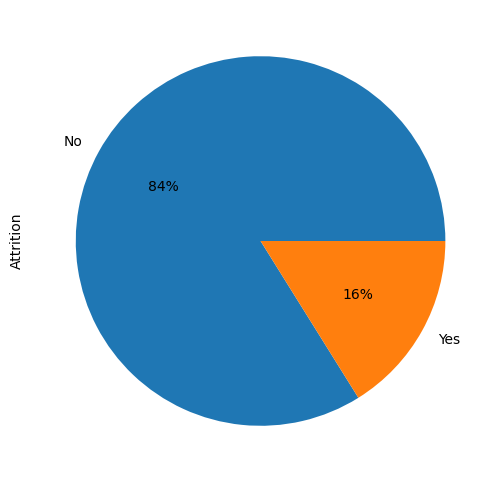

In [9]:
Attrition_records.Attrition.value_counts().plot(kind='pie',
                                                autopct='%1.0f%%',
                                               figsize=(8, 6))

From the output above, it shows that our attrition rate is 16% and non-attrition rate is 84%.

In [7]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [8]:
#Remove unneeded columns
#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1)
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) 

<AxesSubplot:>

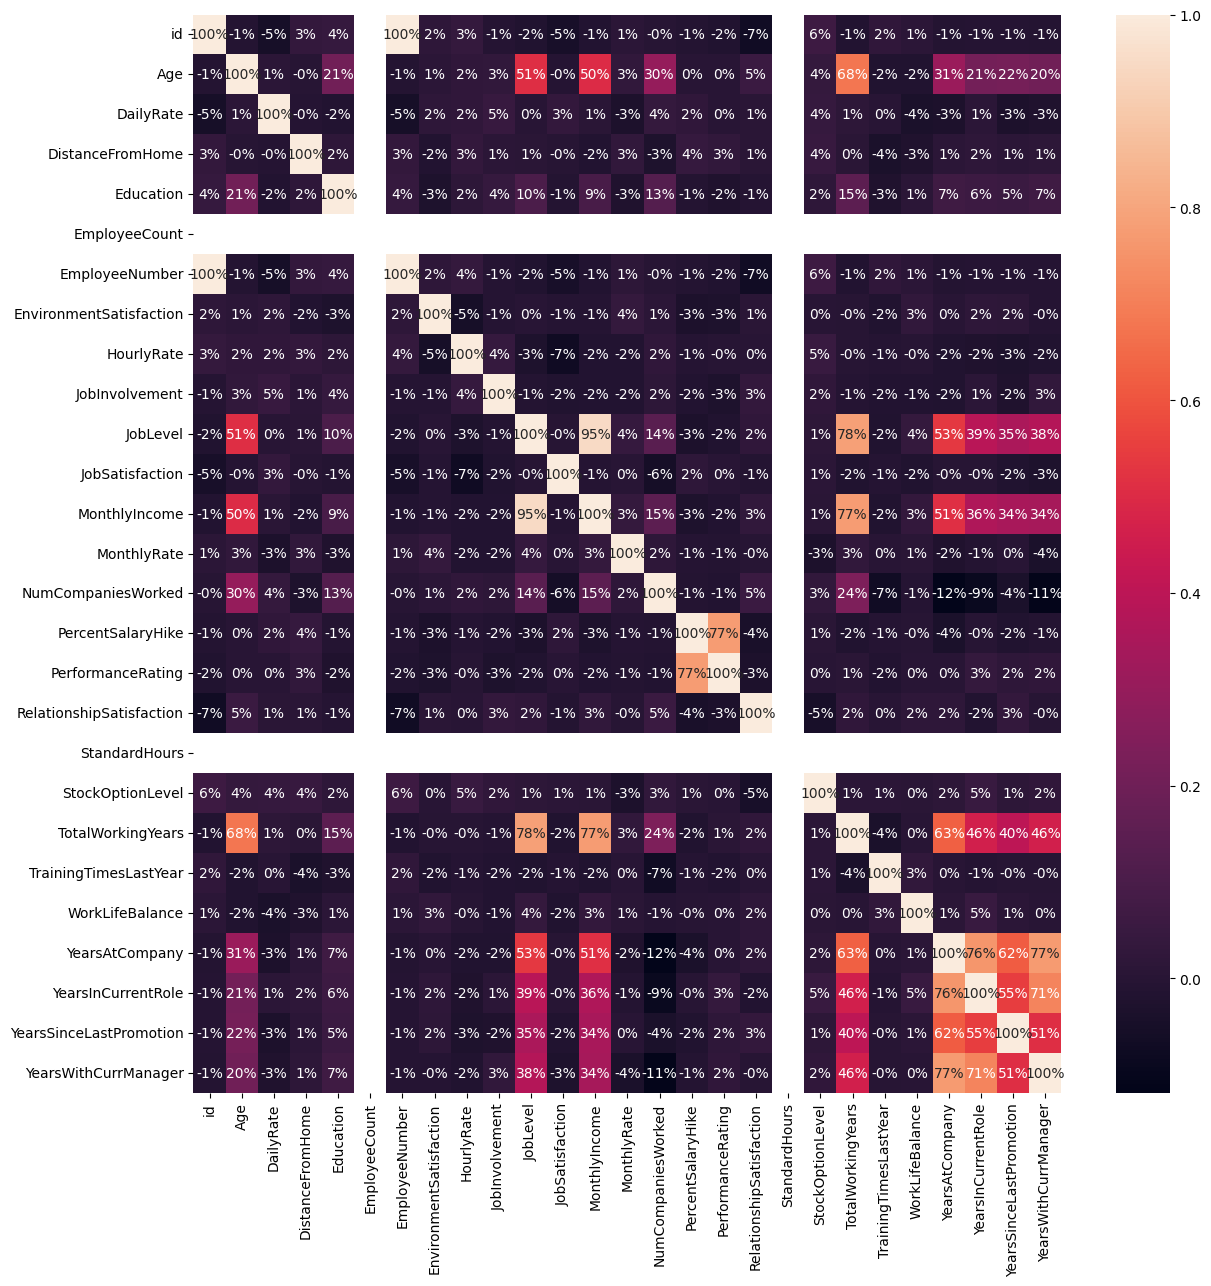

In [16]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [3]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

NameError: name 'df' is not defined

Questions 
1) what are the 3 factors behind employees attrition?

In [5]:
df.groupby('Gender').Attrition.mean()

Gender
0    0.147959
1    0.170068
Name: Attrition, dtype: float64

There is a little higher attrition rate for males than that of females.

In [10]:
df.groupby('MaritalStatus').Attrition.mean()

MaritalStatus
0    0.100917
1    0.124814
2    0.255319
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='MaritalStatus'>

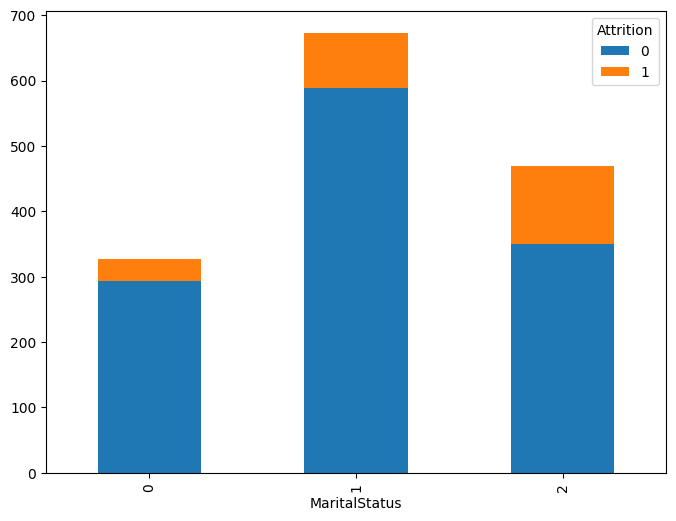

In [13]:
df.groupby(['MaritalStatus', 'Attrition']).size().unstack().plot(kind='bar',
                                                                                stacked=True,
                                                                               figsize=(8, 6))

From the output above the attrition rate is higher among employees with single marital statuses.

In [23]:
df.groupby('Department').Attrition.mean()

Department
0    0.190476
1    0.138398
2    0.206278
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Department'>

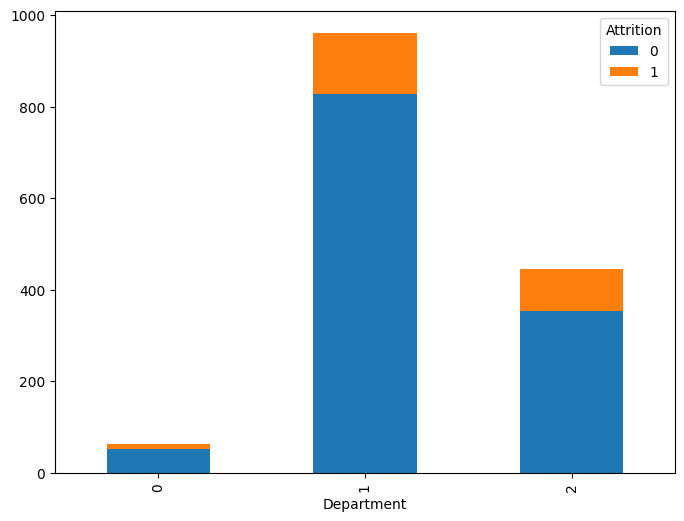

In [7]:
df.groupby(['Department', 'Attrition']).size().unstack().plot(kind='bar',
                                                                                stacked=True,
                                                                               figsize=(8, 6))

Employees in R&D department seem to have less attrition rate among other department employees, with higher attrition in both Human Resources and Sales Department. 

However, when drilled down by gender, females seem to have almost twice the attrition rate as is of the males in HR department.

2) What is the relationship between Education and Monthly income?

In [32]:
df.groupby('EducationField').MonthlyRate.mean()

EducationField
0    737.592593
1    721.438944
2    695.264151
3    708.596983
4    649.719512
5    703.606061
Name: MonthlyRate, dtype: float64

In [31]:
df.groupby('Education').MonthlyRate.mean()

Education
0    760.400000
1    705.847518
2    695.875874
3    707.525126
4    721.729167
Name: MonthlyRate, dtype: float64

The mean monthly rate among the educational variables, there is no drastic difference among the pay rates of different groups. Monthly Pay intuitively does not seem to be a reason for attrition for the educational related attrition.

3) What is the effect of age on attrition?

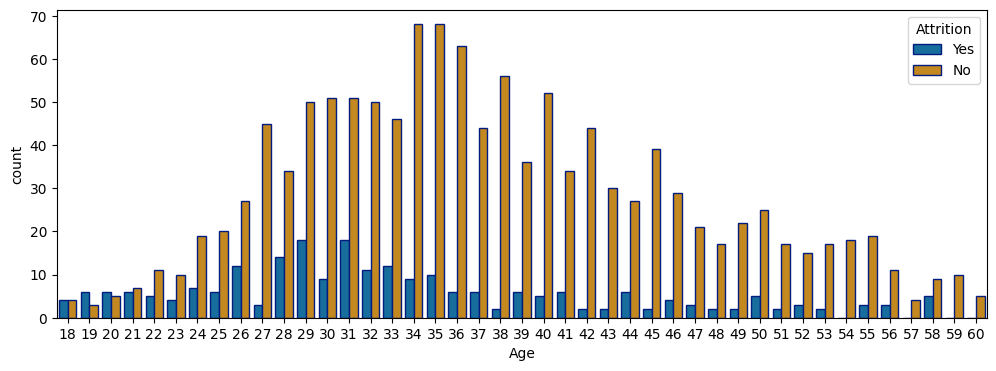

In [6]:
#Show the effect of age on attrition
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

From the output the age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35. Employee attrition rates are higher among employees aged less than 35. The attrition rates are zero among the employees aged 59 and 60.

4) Is income the main factor in employee attrition?

In [44]:
# Income as the main factor in employee attrition
sns.kdeplot(Attrition_Y.MonthlyIncome)
sns.kdeplot(Attrition_N.MonthlyIncome)
plt.legend(('Yes', 'No'))


NameError: name 'Attrition_Y' is not defined

The median salaries of Managers and Research Director has to be obviously on the higher side. 
The median salary of Sales Representatives, Laboratory Technicians and Human Reources Employees tends to be on the lower side. In the above attrition rate vs job role graph, these groups comparatively had the highest attrition among the other roles. This possibly leads to the fact that lower monthly rate could be a cause for higher attrition rates of these employee groups.

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot('JobRole', 'MonthlyIncome', hue = 'Gender',data = df)

TypeError: boxplot() got multiple values for argument 'data'

<Figure size 1500x600 with 0 Axes>

There is a stark difference in the salary of males and females under the job role of Manager and Research Director.

5.How does work-life balance impact the overall attrition rate?

TypeError: barplot() got multiple values for argument 'data'

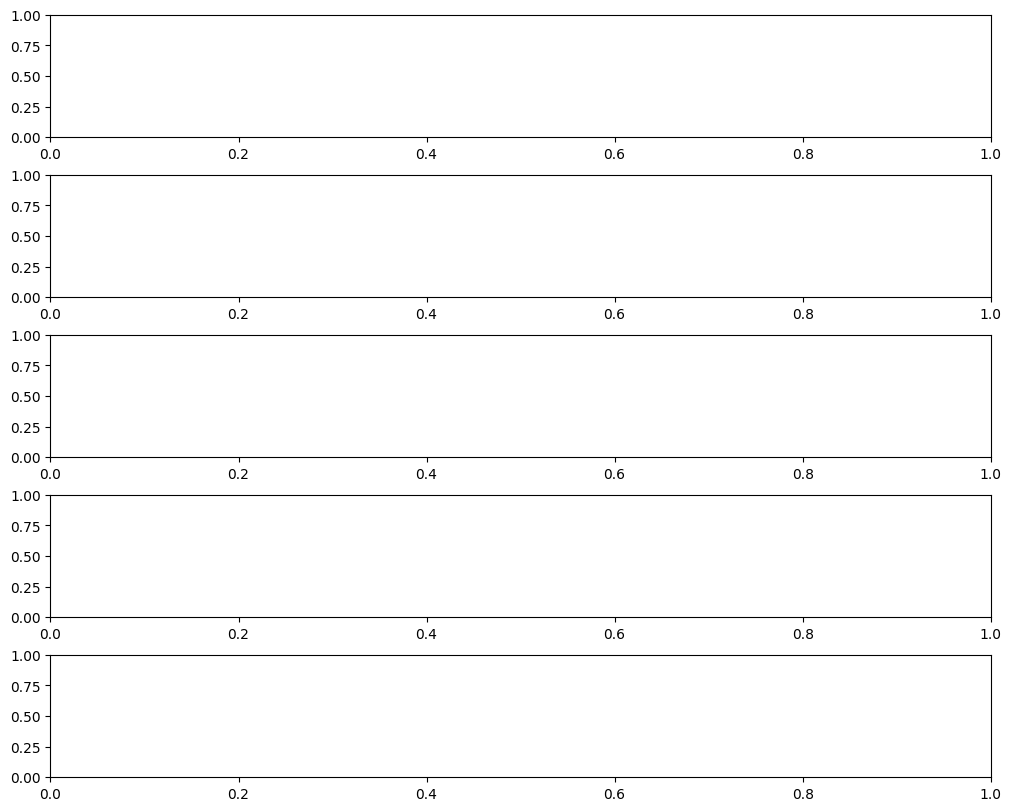

In [49]:
cols = ['JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction']
fig, ax = plt.subplots(len(cols),1, figsize= (10,8), constrained_layout=True)
for i, col in enumerate(cols):
    
    sns.barplot(col,'Attrition', data = df, ax = ax[i], ci = None)

JobInvolvement 1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’ JobSatisfaction 1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’ RelationshipSatisfaction 1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’ WorkLifeBalance 1 ‘Bad’ 2 ‘Good’ 3 ‘Better’ 4 ‘Best’ EnvironmentSatisfaction 1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’ Intuitively, it can be clearly seen that dissatisfied employees having lower satisfaction and poor work life balance tend to have a higher attrition rate than their other counterparts.

CONCLUSION 
Basically, there are many factors that causes attrition, from the output above the major factors are Gender, Marital status and Department.